# EDA Spray Data

---

Contents

- [1.0 Observations](#1.0-Observations)
- [2.0 Load Data](#2.0-Load-Data)
- [3.0 Overview](#3.0-Overview)
    - [3.1 Convert Dates](#3.1-Convert-Dates)
    - [3.2 Convert Time](#3.2-Convert-Time)
- [4.0 Explore Time Data](#4.0-Explore-Time-Data)
- [5.0 Explore Locations](#5.0-Explore-Locations)



---

# 1.0 Observations

#### Overview

+ 4 columns Date, Time, Latitude and Longitude
+ Referring to when and where spraying took place around Chicago

#### Time
+ The records show data for only 2 years: 2011 and 2013
+ Spraying happens in the evening 74% of the time betwen 8-10pm
    + 584 rows with missing time. Given average as it heavily skewed anyway.
+ Only Spray in the Summer months of July, August and September
+ Only 4 spraying days but mostly
    + Thursday 72%
    + Wednesday 23.4%

#### Location
+ Data of spraying is mostly in the Chicago district, Some clusters of spraying 

---

# 2.0 Load Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 

import time
import datetime as dt

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
spray = pd.read_csv("./assets/spray.csv")

---

# 3.0 Overview

In [3]:
# Check the dataframe
spray.shape

(14835, 4)

In [4]:
# look at the head
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [5]:
# look at the tail
spray.tail()

,Date,Time,Latitude,Longitude
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423
14834,2013-09-05,8:35:41 PM,42.004805,-87.817460


In [6]:
# Rename columns
spray.rename(columns={'Date':'date','Time':'time','Latitude':'latitude','Longitude':'longitude'}, inplace=True)

In [7]:
# check changes
spray.columns

Index(['date', 'time', 'latitude', 'longitude'], dtype='object')

In [8]:
# Check for duplicates
spray.duplicated().sum()

541

In [9]:
# Drop duplicates
spray.drop_duplicates(inplace=True)

In [10]:
# Check Changes
spray.shape

(14294, 4)

In [11]:
# check Nulls
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [12]:
# Find the nulls
spray.loc[spray['time'].isnull()]

,date,time,latitude,longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


#### Observation
584 rows are missing time.  I will investigate these further in the time section and decide whether to impute, drop or another method.


---

In [13]:
# Look at data types
spray.dtypes

date          object
time          object
latitude     float64
longitude    float64
dtype: object

In [14]:
# Check in more detail
type(spray.loc[1,'date']),type(spray.loc[1,'time']),type(spray.loc[1,'latitude']),type(spray.loc[1,'longitude'])

(str, str, numpy.float64, numpy.float64)

In [15]:
# Look at the data statistics
spray.describe()

,latitude,longitude
count,14294.000000,14294.000000
mean,41.901739,-87.734512
std,0.105100,0.067599
min,41.713925,-88.096468
25%,41.782669,-87.789607
50%,41.937578,-87.724781
75%,41.977217,-87.692107
max,42.395983,-87.586727


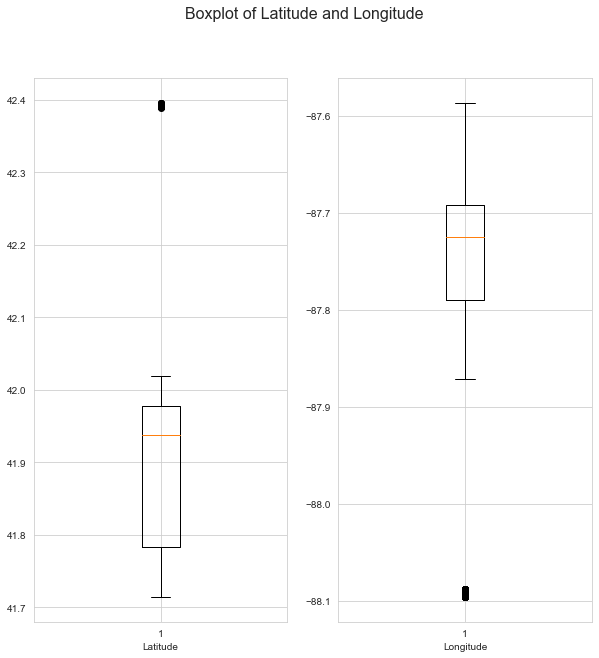

In [16]:
# Create subplots
fig = plt.figure(figsize=(10,10))
fig.suptitle('Boxplot of Latitude and Longitude', fontsize=16)

axes1 = fig.add_subplot(121)
axes2 = fig.add_subplot(122)

axes1.set_xlabel('Latitude')
axes2.set_xlabel('Longitude')


# plotting graph for 1st column 
axes1.boxplot(spray['latitude']) 
  
# plotting graph for second column 
axes2.boxplot(spray['longitude']);

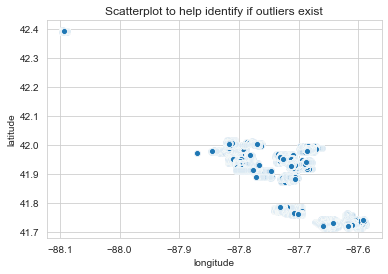

In [17]:
# Plot on scatter chart
ax = sns.scatterplot(y = spray['latitude'], x = spray['longitude'])
ax.set_title('Scatterplot to help identify if outliers exist');

#### Observations:
From the box plot it appears that there are outliers for both Longitude and Latitude. The scatter plot shows there looks to be outliers at the top left. I will investigate whether this is the case in section 5.0.

---

# 3.1 Convert Dates

In [18]:
# Change date to datetime
spray['date'] = pd.to_datetime(spray['date'])

In [19]:
# Check its complete
type(spray.loc[2,'date'])

pandas._libs.tslibs.timestamps.Timestamp

---

### Convert the date in to year, month, day

In [20]:
spray['year'] = pd.DatetimeIndex(spray['date']).year
spray['month'] = pd.DatetimeIndex(spray['date']).month
spray['day'] = pd.DatetimeIndex(spray['date']).day
spray['wday'] = pd.DatetimeIndex(spray['date']).weekday


In [21]:
spray.head()

,date,time,latitude,longitude,year,month,day,wday
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,8,29,0
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011,8,29,0
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011,8,29,0
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011,8,29,0
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011,8,29,0


---

# 3.2 Convert Time

In [22]:
# Add missing to null values for now
spray.loc[spray['time'].isnull(),'time'] = 'missing'

In [23]:
# Function to change time string  into 24hr format and remove spaces

def update24(time): 
    
    if time == 'missing':
        return time
    
    # trim text to remove any extra spaces
    time = time.strip()
    
    # Update 12 AM to make it lead with '00'
    if time[-2:] == "AM" and time[:2] == "12": 
        return "00" + time[2:-2].strip()  
          
    # If AM time is in 24hr so just remove 'AM'   
    elif time[-2:] == "AM" and time[:2] != ':': 
        return time[:-2].strip() 
    
    # If 'AM' and single digit need to a '0'
    elif time[-2:] == "AM" and time[:2] == ':':
        return '0' + time[:-2] 
          
    # If its evening - add 12 to hours and remove PM     
    else: 
        try:
            return str(int(time[:2]) + 12) + time[2:8].strip()  
        except:
            return str(int(time[:1]) + 12) + time[1:7].strip()  
  


In [24]:
# Update the text into 24hr
spray['time'] = spray['time'].apply(lambda x: update24(x))

---

## Misssing Values
+ I found out 75% of the values are between 8-10. Therefore I will give it an average of 9pm. They are only a small percentage of the data but it would still be good too keep them for their location dataa

In [25]:
# Update missing values
spray.loc[spray['time'] == 'missing','time'] = '21:00:00'

---

# 4.0 Explore Time Data

#### Create time histograms

In [26]:
# Create hour column
spray['hour'] = spray['time'].apply(lambda x: int(x[:2]))

In [27]:
spray.groupby('hour')['hour'].sum()


hour
0          0
10        50
18       270
19     14535
20    105660
21    114093
22     41668
23     17434
Name: hour, dtype: int64

In [28]:
spray['hour'].value_counts(normalize=True) * 100

21    38.008955
20    36.959563
22    13.250315
19     5.351896
23     5.302924
0      0.986428
18     0.104939
10     0.034980
Name: hour, dtype: float64

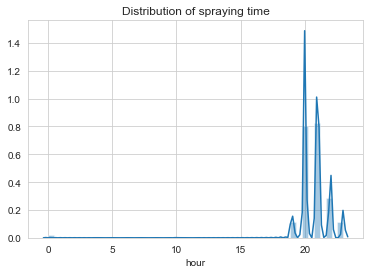

In [29]:
# Plot on scatter chart
ax = sns.distplot(spray['hour'])
ax.set_title('Distribution of spraying time');


All the spraying was done in the evening. If I bucketed by shorter time frames the distrubtion would look even more normal.

In [30]:
# Investigate the year columns
spray.groupby('year')['year'].sum()

year
2011     3354348
2013    25416138
Name: year, dtype: int64

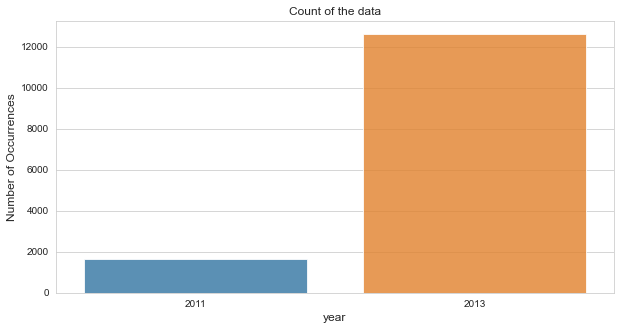

In [31]:
# Plot of the distribution of years
year_count  = spray['year'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('Count of the data')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('year', fontsize=12)
plt.show()


### Observations
+ There are only 2 years of data
+ Data is skewed towards 2013

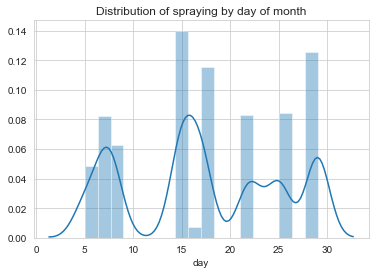

In [32]:
# Investigate the day data
ax = sns.distplot(spray['day'])
ax.set_title('Distribution of spraying by day of month');

### Observations
+ Looks like its not done everyday so I will look at week day data to see if there is further information

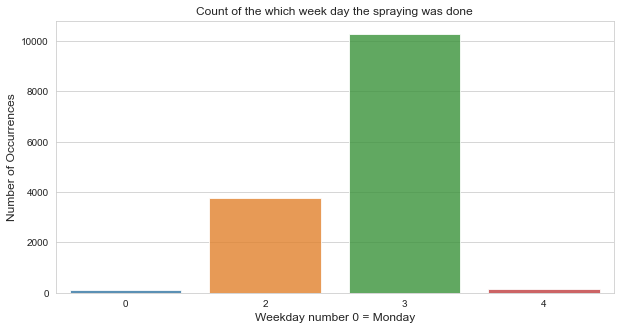

In [33]:
# Barplot of week day
day_count  = spray['wday'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(day_count.index, day_count.values, alpha=0.8)
plt.title('Count of the which week day the spraying was done')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weekday number 0 = Monday', fontsize=12)
plt.show()


In [34]:
# Get the percentages
spray['wday'].value_counts(normalize=True) * 100

3    71.939275
2    26.409682
4     0.986428
0     0.664615
Name: wday, dtype: float64

In [35]:
spray['wday'].value_counts()

3    10283
2     3775
4      141
0       95
Name: wday, dtype: int64

#### They did most of the spraying on Thursdays but also on Wednesday

In [36]:
# Investigate the month
spray.groupby('month')['month'].sum()

month
7    26663
8    63904
9    22473
Name: month, dtype: int64

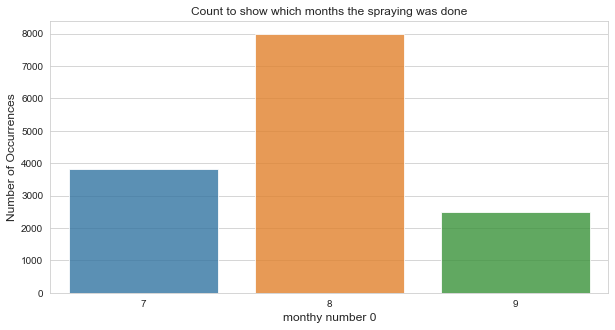

In [37]:
# Barplot to show which month sparying was done
day_count  = spray['month'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(day_count.index, day_count.values, alpha=0.8)
plt.title('Count to show which months the spraying was done')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('monthy number 0', fontsize=12)
plt.show()

#### Spray only in the summer months of July, August and September.
+ Rest of the year can be very cold and keep mosquito populaton under control

---

# 5.0 Explore Locations

[I used the Code from this blog posting to help map chicago with Bokeh](https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-ii-intro-to-bokeh-5dca6c5ced10)

In [38]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON, get_provider, Vendors

In [39]:
import math
from ast import literal_eval

In [40]:
# Create function to return cooodrinates which can be plotted in 2d
def merc(coords):
    coordinates = literal_eval(coords)
    lat = coordinates[0]
    lon = coordinates[1]

    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (y, x)

In [41]:
# Create column so function can work properly
spray['coords'] = '(' + spray['latitude'].astype(str) + ', ' + spray['longitude'].astype(str) + ')'

In [42]:
# Create the mercator coordinates
spray['coords_lat'] = spray['coords'].apply(lambda x: merc(x)[0])
spray['coords_long'] = spray['coords'].apply(lambda x: merc(x)[1])

In [43]:
# check there are no duplicates
spray.duplicated('coords').sum()

0

In [44]:
# drop 'coords' column as its not needed
spray.drop(columns='coords', inplace=True)
spray.reset_index(drop=True);

#### There are no duplicated coordinates

In [45]:
spray.head()

,date,time,latitude,longitude,year,month,day,wday,hour,coords_lat,coords_long
0,2011-08-29,18:56:58,42.391623,-88.089163,2011,8,29,0,18,5.219824e+06,-9.806041e+06
1,2011-08-29,18:57:08,42.391348,-88.089163,2011,8,29,0,18,5.219783e+06,-9.806041e+06
2,2011-08-29,18:57:18,42.391022,-88.089157,2011,8,29,0,18,5.219734e+06,-9.806040e+06
3,2011-08-29,18:57:28,42.390637,-88.089158,2011,8,29,0,18,5.219676e+06,-9.806040e+06
4,2011-08-29,18:57:38,42.390410,-88.088858,2011,8,29,0,18,5.219642e+06,-9.806007e+06


In [46]:
#p = figure(x_range=(-9780700, -9745000), y_range=(5130000, 5160000), x_axis_type="mercator", y_axis_type="mercator")
# plt.figure(figsize=(15,15))
p = figure(x_range=(-9780700, -9745000), y_range=(5110000, 5220500), x_axis_type="mercator", y_axis_type="mercator", 
           plot_width=800, plot_height=600)
p.add_tile(get_provider('CARTODBPOSITRON'))
p.circle(x=spray['coords_long'],
         y=spray['coords_lat'], 
         #size=Merged['circle_sizes'],
         size=0.5,
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
    
output_notebook()
show(p)

Loading BokehJS ...

In [47]:
#### NB I Decided against dropping the outlier coordinates as they are real

In [48]:
#p = figure(x_range=(-9780700, -9745000), y_range=(5130000, 5160000), x_axis_type="mercator", y_axis_type="mercator")
# plt.figure(figsize=(15,15))
p = figure(x_range=(-9771000, -9745000), y_range=(5115000, 5165000), x_axis_type="mercator", y_axis_type="mercator", 
           plot_width=800, plot_height=600)
p.add_tile(get_provider('CARTODBPOSITRON'))
p.circle(x=spray['coords_long'],
         y=spray['coords_lat'], 
         #size=Merged['circle_sizes'],
         size=0.5,
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.001)
    
output_notebook()
show(p)

Loading BokehJS ...

In [49]:
# show spraying on the map by year

In [50]:
coords2013 = spray.loc[spray['year'] == 2013, ['coords_lat','coords_long']]
coords2011 = spray.loc[spray['year'] == 2011, ['coords_lat','coords_long']]

In [51]:
#p = figure(x_range=(-9780700, -9745000), y_range=(5130000, 5160000), x_axis_type="mercator", y_axis_type="mercator")
# plt.figure(figsize=(15,15))
p = figure(x_range=(-9780700, -9745000), y_range=(5110000, 5220500), x_axis_type="mercator", y_axis_type="mercator", 
           plot_width=800, plot_height=600)
p.add_tile(get_provider('CARTODBPOSITRON'))
p.circle(x=coords2013['coords_long'],
         y=coords2013['coords_lat'], 
         #size=Merged['circle_sizes'],
         size=0.5,
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
p.circle(x=coords2011['coords_long'],
         y=coords2011['coords_lat'], 
         #size=Merged['circle_sizes'],
         size=0.5,
         line_color="#26418F", 
         fill_color="#26418F",
         fill_alpha=0.05)
    
output_notebook()
show(p)

Loading BokehJS ...

---

# Save Spray data

In [52]:
# Commented so it doesnt save over data
# spray.to_csv('./assets/spray_clean.csv', index=False)

### This is interesting but unless this data is combined with the trap information I can only infer a small amount of information

+ In the next work book we will look to explore the relationship between the trap data in the training set and the spray data
+ This may reveal some patterns
+ The timing of the spraying will also be explored.